<a href="https://colab.research.google.com/github/rikrdinii1/PDN-Data21/blob/main/Analisis_Deuda%2C_Ingresos_Totales%2C_Estudios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [154]:
# Lectura inicial de los datos
metadata = pd.read_csv('/content/drive/MyDrive/Dataton2021/metadata.csv')
data_gen = pd.read_csv('/content/drive/MyDrive/Dataton2021/Datos_Generales.csv')
deuda = pd.read_csv('/content/drive/MyDrive/Dataton2021/Adeudos.csv')
datos_empleo = pd.read_csv('/content/drive/MyDrive/Dataton2021/Datos_EmpleoCargoComision.csv')
estudios = pd.read_csv('/content/drive/MyDrive/Dataton2021/Estudios.csv')
exp_laboral = pd.read_csv('/content/drive/MyDrive/Dataton2021/Experiencia_Laboral.csv')
ingresos = pd.read_csv('/content/drive/MyDrive/Dataton2021/Ingresos_Anuales.csv')

# Transformacion de datos
metadata.drop('Unnamed: 0', axis=1,inplace=True)
metadata.reset_index(drop=True,inplace=True)
metadata['actualizacion'] = pd.to_datetime(metadata['actualizacion'])

data_gen.drop('Unnamed: 0', axis=1,inplace=True)
data_gen.reset_index(drop=True,inplace=True)
data_gen['regimenMatrimonial.valor'].replace({'Separación de Bienes':'SEPARACIÓN DE BIENES'}, inplace=True)
data_gen['situacionPersonalEstadoCivil.valor'].replace({'SOLTERO (A)':'SOLTERO', 
                                                        'DIVORCIADO (A)':'DIVORCIADO',
                                                        'CASADO (A)':'CASADO',
                                                        'VIUDO (A)':'VIUDO'},inplace=True)

ingresos.drop('Unnamed: 0', axis=1,inplace=True)
ingresos.replace({np.nan:0})

ingresos = ingresos[[
       'totalIngresosAnualesNetos.valor',
       '_id', 'id',
       'totalIngresosConclusionNetos.valor',
       'serviciosProfesionales.valor',
       'otrosIngresosMensualesTotal.valor',
       'otrosIngresosTotal.valor'
       ]]


# Nos quedamos solo con las columnas utiles
cols = ['nombre', 'primerApellido', 'segundoApellido', 'curp', 'paisNacimiento',
       'nacionalidad', 'rfc.rfc', 'rfc.homoClave',
       'situacionPersonalEstadoCivil.clave',
       'situacionPersonalEstadoCivil.valor', '_id', 'id',
       'regimenMatrimonial.clave', 'regimenMatrimonial.valor']

data_gen = data_gen[cols]

data = pd.merge(metadata,data_gen,on='id')
data.drop('_id_x',axis=1,inplace=True)

deuda.drop('Unnamed: 0', axis=1,inplace=True)
deuda = pd.merge(deuda,data,on='id')
deuda.drop('_id_y', axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,49,50,52,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [155]:

data.head()

,actualizacion,tipo,institucion,declaracionCompleta,actualizacionConflictoInteres,id,nombre,primerApellido,segundoApellido,curp,paisNacimiento,nacionalidad,rfc.rfc,rfc.homoClave,situacionPersonalEstadoCivil.clave,situacionPersonalEstadoCivil.valor,_id_y,regimenMatrimonial.clave,regimenMatrimonial.valor
0,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,ca1336ce-9a12-413a-bab3-b57d85a0948d,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,61a804c8f6e28cab0bf39988,NaN,NaN
1,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,c059912d-1d11-4f50-b027-f6dfca8f8418,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,61a804c8f6e28cab0bf39989,NaN,NaN
2,2017-06-06 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,ff372d3d-d898-40f8-8577-9cd5ffa1be68,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,61a804c8f6e28cab0bf3998a,NaN,NaN
3,2015-02-06 00:00:00+00:00,INICIAL,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,2f8f42bf-56cc-4c14-af44-d744b70824a4,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,61a804c8f6e28cab0bf3998b,NaN,NaN
4,2020-06-08 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,5736d89a-a9bc-4fad-be67-985aa04b47df,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,61a804c8f6e28cab0bf3998c,NaN,NaN


In [156]:

deuda.head()

,tipoOperacion,titular,numeroCuentaContrato,fechaAdquisicion,porcentajeIncrementoDecremento,tipoAdeudo.clave,tipoAdeudo.valor,montoOriginal.valor,montoOriginal.moneda,otorganteCredito.tipoPersona,otorganteCredito.nombreInstitucion,otorganteCredito.rfc,localizacionAdeudo.pais,saldoInsolutoDiciembreAnterior.valor,saldoInsolutoDiciembreAnterior.moneda,_id,id,actualizacion,tipo,institucion,declaracionCompleta,actualizacionConflictoInteres,nombre,primerApellido,segundoApellido,curp,paisNacimiento,nacionalidad,rfc.rfc,rfc.homoClave,situacionPersonalEstadoCivil.clave,situacionPersonalEstadoCivil.valor,regimenMatrimonial.clave,regimenMatrimonial.valor
0,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",98684638,2010-12-01,7%,PRPE,PRÉSTAMO PERSONAL,27989,MXN,MORAL,Frías - Morales,4b594293-4d33-443c-98bc-4b5f1481406b,MX,38692,MXN,61a804c8f6e28cab0bf39988,ca1336ce-9a12-413a-bab3-b57d85a0948d,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
1,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",23662543,2010-12-01,5%,CPER,CRÉDITO PERSONAL,48034,MXN,MORAL,Coronado S.L.,38a59df9-c50f-4167-b7ab-fcaa8c083b8c,MX,32848,MXN,61a804c8f6e28cab0bf39988,ca1336ce-9a12-413a-bab3-b57d85a0948d,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
2,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",46361608,2010-12-01,15%,CPER,CRÉDITO PERSONAL,10330,MXN,MORAL,Alanis - Guardado,407e8b14-bf51-4b70-9f97-a2be1dc81b74,MX,10115,MXN,61a804c8f6e28cab0bf39988,ca1336ce-9a12-413a-bab3-b57d85a0948d,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
3,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",98684638,2010-12-01,7%,PRPE,PRÉSTAMO PERSONAL,27989,MXN,MORAL,Frías - Morales,4b594293-4d33-443c-98bc-4b5f1481406b,MX,38692,MXN,61a804c8f6e28cab0bf39989,c059912d-1d11-4f50-b027-f6dfca8f8418,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
4,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",23662543,2010-12-01,5%,CPER,CRÉDITO PERSONAL,48034,MXN,MORAL,Coronado S.L.,38a59df9-c50f-4167-b7ab-fcaa8c083b8c,MX,32848,MXN,61a804c8f6e28cab0bf39989,c059912d-1d11-4f50-b027-f6dfca8f8418,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN


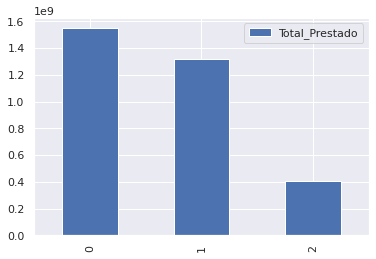

In [157]:
# ¿Que instituciones tienen la mayor cantidad de deuda con los servidores publicos?
deuda_total = deuda.groupby('otorganteCredito.nombreInstitucion',as_index = False).agg({'saldoInsolutoDiciembreAnterior.valor':'sum'})
deuda_total.columns = ['Institucion', 'Total_Prestado']
deuda_total.sort_values(by='Total_Prestado', ascending=False, inplace=True)
deuda_total.reset_index(drop=True, inplace=True)
deuda_total.plot(kind='bar')

In [158]:
deuda_total

,Institucion,Total_Prestado
0,Frías - Morales,1548415148
1,Coronado S.L.,1314544112
2,Alanis - Guardado,404792185


In [159]:
total_prestado = deuda_total['Total_Prestado'].sum()

In [160]:
# ¿Que servidor publico está más endeudado?
deuda_serv_publico = deuda.groupby('curp',as_index=False).agg({'saldoInsolutoDiciembreAnterior.valor':'sum'})
deuda_serv_publico.columns = ['curp','Deuda_Total']
deuda_serv_publico.sort_values(by='Deuda_Total', ascending=False, inplace=True)
top20 = deuda_serv_publico.head(20).reset_index(drop=True)
top20
# Viendo el Top 20 de los más endeudados, podemos observar que todos presentan el mismo monto de deuda. 

,curp,Deuda_Total
0,ABAF800309HPURÑT08,653240
1,PAZA840821HDFZVS04,653240
2,PEAI880706HVZDNC04,653240
3,PEAG820221MPURRB03,653240
4,PEAC730504HSNLLT05,653240
5,PAÁR860114HSNRLN04,653240
6,PAZS720819HVZTMB01,653240
7,PAZM810521HSNLMN05,653240
8,PAZA860706MPUTMR03,653240
9,PAYJ841027HPURBS04,653240


In [161]:
# En donde laboran los servidores publicos más endeudados?
deuda.head()

deuda_institu = deuda.groupby('institucion', as_index=False).agg({'saldoInsolutoDiciembreAnterior.valor':'sum'})
deuda_institu.columns = ['institucion', 'Total_Deuda']
deuda_institu.sort_values(by='Total_Deuda', ascending=False, inplace=True)
top20_institu = deuda_institu.head(20).reset_index(drop=True)
top20_institu

,institucion,Total_Deuda
0,CENTRO DE INVESTIGACIONES EN OPTICA A.C.,20250440
1,COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS,19597200
2,SERVICIO POSTAL MEXICANO,17637480
3,INSTITUTO NACIONAL DE CIENCIAS MEDICAS Y NUTRI...,15677760
4,PREVENCION Y READAPTACION SOCIAL,15677760
5,TRIBUNAL FEDERAL DE CONCILIACION Y ARBITRAJE,15024520
6,INSTITUTO NACIONAL DE BELLAS ARTES Y LITERATURA,15024520
7,INSTITUTO NACIONAL DE MIGRACION,15024520
8,EDUCAL S.A. DE C.V.,15024520
9,COMISION REGULADORA DE ENERGIA,14371280


In [162]:
ingresos_deuda = pd.merge(ingresos,deuda,on='id')
ingresos_deuda.drop(['_id_x','_id_y'], axis=1, inplace=True)

ingresos_deuda.head()

,totalIngresosAnualesNetos.valor,id,totalIngresosConclusionNetos.valor,serviciosProfesionales.valor,otrosIngresosMensualesTotal.valor,otrosIngresosTotal.valor,tipoOperacion,titular,numeroCuentaContrato,fechaAdquisicion,porcentajeIncrementoDecremento,tipoAdeudo.clave,tipoAdeudo.valor,montoOriginal.valor,montoOriginal.moneda,otorganteCredito.tipoPersona,otorganteCredito.nombreInstitucion,otorganteCredito.rfc,localizacionAdeudo.pais,saldoInsolutoDiciembreAnterior.valor,saldoInsolutoDiciembreAnterior.moneda,actualizacion,tipo,institucion,declaracionCompleta,actualizacionConflictoInteres,nombre,primerApellido,segundoApellido,curp,paisNacimiento,nacionalidad,rfc.rfc,rfc.homoClave,situacionPersonalEstadoCivil.clave,situacionPersonalEstadoCivil.valor,regimenMatrimonial.clave,regimenMatrimonial.valor
0,506688.0,ca1336ce-9a12-413a-bab3-b57d85a0948d,NaN,NaN,NaN,NaN,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",98684638,2010-12-01,7%,PRPE,PRÉSTAMO PERSONAL,27989,MXN,MORAL,Frías - Morales,4b594293-4d33-443c-98bc-4b5f1481406b,MX,38692,MXN,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
1,506688.0,ca1336ce-9a12-413a-bab3-b57d85a0948d,NaN,NaN,NaN,NaN,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",23662543,2010-12-01,5%,CPER,CRÉDITO PERSONAL,48034,MXN,MORAL,Coronado S.L.,38a59df9-c50f-4167-b7ab-fcaa8c083b8c,MX,32848,MXN,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
2,506688.0,ca1336ce-9a12-413a-bab3-b57d85a0948d,NaN,NaN,NaN,NaN,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",46361608,2010-12-01,15%,CPER,CRÉDITO PERSONAL,10330,MXN,MORAL,Alanis - Guardado,407e8b14-bf51-4b70-9f97-a2be1dc81b74,MX,10115,MXN,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
3,105560.0,c059912d-1d11-4f50-b027-f6dfca8f8418,NaN,NaN,NaN,NaN,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",98684638,2010-12-01,7%,PRPE,PRÉSTAMO PERSONAL,27989,MXN,MORAL,Frías - Morales,4b594293-4d33-443c-98bc-4b5f1481406b,MX,38692,MXN,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
4,105560.0,c059912d-1d11-4f50-b027-f6dfca8f8418,NaN,NaN,NaN,NaN,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",23662543,2010-12-01,5%,CPER,CRÉDITO PERSONAL,48034,MXN,MORAL,Coronado S.L.,38a59df9-c50f-4167-b7ab-fcaa8c083b8c,MX,32848,MXN,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN


In [163]:
# ¿Cual es el ratio de deuda vs ingresos de los servidores publicos?
ratio = ingresos_deuda.groupby('curp', as_index=False).agg({'saldoInsolutoDiciembreAnterior.valor':'sum',
                                                    'totalIngresosAnualesNetos.valor':'sum'})
ratio.columns = ['curp', 'deuda', 'ingresos_netos']
ratio['%_de_deuda'] = (ratio['deuda']/ratio['ingresos_netos'])*100
ratio.sort_values(by='%_de_deuda', ascending=False, inplace=True)
ratio.reset_index(drop=True, inplace=True)
top20_ratio = ratio.head(20)
top20_ratio

# Podemos observar que:
#- hay empleados que se encuentran endeudados sin recibir un ingreso
#- Los mismos Curp que aparecen con deuda tienen el mismo ingreso neto total

,curp,deuda,ingresos_netos,%_de_deuda
0,MABG880226MHGRLR03,408275,0.0,inf
1,ROCM780403HYNDLN05,81655,0.0,inf
2,ROCA900530MYNDLL04,163310,0.0,inf
3,ABAF800309HPURÑT08,653240,7917000.0,8.251105
4,ORVJ810515MSNTLN06,653240,7917000.0,8.251105
5,TOAV890405HDFRTC04,653240,7917000.0,8.251105
6,CORF700225MDFLZR06,653240,7917000.0,8.251105
7,TOAA830117HVZLCN08,653240,7917000.0,8.251105
8,ARSJ880908HAGMLN08,653240,7917000.0,8.251105
9,COMR790004HDFLNM04,653240,7917000.0,8.251105


In [164]:
# ¿En que dependencias se encuentran los mayores ingresos netos anuales?
ingresos_inst = ingresos_deuda.groupby('institucion', as_index=False).agg({'saldoInsolutoDiciembreAnterior.valor':'sum'})
ingresos_inst.columns = ['institucion', 'ingresos_totales']
ingresos_inst.sort_values(by='ingresos_totales', ascending=False, inplace=True)
ingresos_inst.reset_index(drop=True, inplace=True)
top20_ingr_inst = ingresos_inst.head(20)

top20_ingr_inst

# Podemos observar que son las mismas 20 instituciones en las que aparecen los empleados puplicos más endeudados. 

,institucion,ingresos_totales
0,CENTRO DE INVESTIGACIONES EN OPTICA A.C.,20250440
1,COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS,19597200
2,SERVICIO POSTAL MEXICANO,17637480
3,INSTITUTO NACIONAL DE CIENCIAS MEDICAS Y NUTRI...,15677760
4,PREVENCION Y READAPTACION SOCIAL,15677760
5,TRIBUNAL FEDERAL DE CONCILIACION Y ARBITRAJE,15024520
6,INSTITUTO NACIONAL DE BELLAS ARTES Y LITERATURA,15024520
7,INSTITUTO NACIONAL DE MIGRACION,15024520
8,EDUCAL S.A. DE C.V.,15024520
9,COMISION REGULADORA DE ENERGIA,14371280


In [165]:
# ¿Quienes son los servidores publicos con mayores ingresos?
ingresos_servidor = ingresos_deuda.groupby('curp', as_index=False).agg({'totalIngresosAnualesNetos.valor':'sum'})
ingresos_servidor.columns = ['curp','ingreso_anual_neto']
ingresos_servidor.sort_values(by='ingreso_anual_neto', ascending=True, inplace=True)
ingresos_servidor.reset_index(drop=True,inplace=True)
top20_servidores_mayor_ingreso = ingresos_servidor.head(20)
top20_servidores_mayor_ingreso

# Primeramente nos percatamos que todos estos sueldos superan el monto maximo permitido por ley para que pueda ser persibido por un servidor publico. 

,curp,ingreso_anual_neto
0,ROCA900530MYNDLL04,0.0
1,ROCM780403HYNDLN05,0.0
2,MABG880226MHGRLR03,0.0
3,ABAF800309HPURÑT08,7917000.0
4,CONA800601MVZLG 06,7917000.0
5,OSKM761122MVZRNR09,7917000.0
6,TIBB821015MSNRNT01,7917000.0
7,ORVJ810515MSNTLN06,7917000.0
8,ARSJ880908HAGMLN08,7917000.0
9,TIOE840724HDFJRundefined08,7917000.0


In [166]:
estudios.drop('Unnamed: 0', axis=1, inplace=True)
estudios.head()

,tipoOperacion,carreraAreaConocimiento,status,documentoObtenido,fechaObtencion,nivel.clave,nivel.valor,institucionEducativa.nombre,institucionEducativa.ubicacion,_id,id,estatus
0,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf39988,ca1336ce-9a12-413a-bab3-b57d85a0948d,NaN
1,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf39989,c059912d-1d11-4f50-b027-f6dfca8f8418,NaN
2,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998a,ff372d3d-d898-40f8-8577-9cd5ffa1be68,NaN
3,AGREGAR,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998b,2f8f42bf-56cc-4c14-af44-d744b70824a4,NaN
4,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998c,5736d89a-a9bc-4fad-be67-985aa04b47df,NaN


In [167]:
estudios = pd.merge(estudios, data, on='id')
estudios.drop('_id_y', axis=1, inplace=True)
estudios.head()

,tipoOperacion,carreraAreaConocimiento,status,documentoObtenido,fechaObtencion,nivel.clave,nivel.valor,institucionEducativa.nombre,institucionEducativa.ubicacion,_id,id,estatus,actualizacion,tipo,institucion,declaracionCompleta,actualizacionConflictoInteres,nombre,primerApellido,segundoApellido,curp,paisNacimiento,nacionalidad,rfc.rfc,rfc.homoClave,situacionPersonalEstadoCivil.clave,situacionPersonalEstadoCivil.valor,regimenMatrimonial.clave,regimenMatrimonial.valor
0,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf39988,ca1336ce-9a12-413a-bab3-b57d85a0948d,NaN,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
1,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf39989,c059912d-1d11-4f50-b027-f6dfca8f8418,NaN,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
2,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998a,ff372d3d-d898-40f8-8577-9cd5ffa1be68,NaN,2017-06-06 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
3,AGREGAR,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998b,2f8f42bf-56cc-4c14-af44-d744b70824a4,NaN,2015-02-06 00:00:00+00:00,INICIAL,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
4,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998c,5736d89a-a9bc-4fad-be67-985aa04b47df,NaN,2020-06-08 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
